# 大纲

- [What] 什么是Gradio？
- [Why] 为什么要学习Gradio？
- [How] 怎么使用Gradio？
  - 安装
  - Building Your First Demo
  - 分析mygpt项目

### [What] 什么是Gradio？

Q：什么是Gradio？

- Gradio是一个**python库**，可以帮助你**简单快速**地构建**前端界面**。

> Gradio 是一个开源 Python 软件包，可以让你快速为`机器学习模型`、`API` 或`任何任意 Python 函数`创建一个演示或网络应用程序。然后，您就可以使用 Gradio 内置的分享功能，在几秒钟内分享您的演示或网络应用程序的链接。无需 JavaScript、CSS 或网络托管经验！
>
> 官方网站：[https://www.gradio.app/](https://www.gradio.app)
> 
> 官方文档 - 快速开始：[https://www.gradio.app/guides/quickstart](https://www.gradio.app/guides/quickstart)

<br>

Q：为什么Gradio可以简单快速地构建前端界面？

- gradio库封装了很多组件（Components），堆砌组合即可
- python实现，不需要学习前端编程语言

<br>

Q：Gradio构建的前端界面长什么样子？

Quickstart - demo

三个组件：文本框 Textbox 、按钮 Button 和 图像框 Image

![image.png](assets/quickstart-demo.png)


Q：Gradio怎么把前后端结合起来的？即Gradio的运行原理？

以“Quickstart - demo”为例：

- 表面行为：点击“按钮”后，gradio能从“文本框”中获取输入，向“图像框”中返回输出
- 背后逻辑：输入组件Textbox -> gradio预处理（Preprocessing） -> str -> your function:def() - > str/numpy.array -> gradio后处理（Postprocessing）-> 输出组件Image

![image.png](assets/app-logic.png)

- 总结：在构建此类应用时，重点是需要指明输入组件是哪些，输出组件是哪些，还有自定义的功能函数(可能是模型/api/python函数)

Q：还想再看看更多使用gradio的例子？

- ChatGLM2-6B

[https://github.com/THUDM/ChatGLM2-6B](https://github.com/THUDM/ChatGLM2-6B)

![chatglm-web-demo](assets/chatglm-web-demo.gif)


- gpt_academic

[https://github.com/binary-husky/gpt_academic](https://github.com/binary-husky/gpt_academic)

![gpt_academic-web-demo](assets/gpt_academic-web-demo.gif)


- stable-diffusion-webui

[https://github.com/AUTOMATIC1111/stable-diffusion-webui](https://github.com/AUTOMATIC1111/stable-diffusion-webui)

![stable-diffusion-web-ui](assets/stable-diffusion-web-ui.png)

## [Why] 为什么要学习Gradio？

- 直观演示你的模型、API、函数：需要图形化的界面，但又不太需要过多关心界面
- 快速部署和分享: 只需要多添加一个参数`share=True`，就会生成一个公共URL(72小时后过期)，世界各地的人都可以访问您的URL
  - 公共URL格式示例: `https://a23dsf231adb.gradio.liveve`

## [How] 怎么使用Gradio？

### 安装

- 必要条件：Gradio需要Python 3.8或更高版本
- 安装命令：安装最新版本：`pip install gradio` 或安装指定版本：`pip install gradio==4.7.1`
- 查看包信息：`pip show gradio`

In [2]:
!pip install gradio==4.7.1

  Using cached gradio-4.7.1-py3-none-any.whl.metadata (17 kB)
  Using cached gradio_client-0.7.0-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio-4.7.1-py3-none-any.whl (16.5 MB)
Using cached gradio_client-0.7.0-py3-none-any.whl (302 kB)
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.8.1
    Uninstalling gradio_client-0.8.1:
      Successfully uninstalled gradio_client-0.8.1


### Building Your First Demo

#### gr.Interface

- [https://www.gradio.app/docs/interface](https://www.gradio.app/docs/interface)
- high-level class
- Interface 类旨在为接受一个或多个输入并返回一个或多个输出的机器学习模型创建演示。
- Interface 类有三个核心参数：
    - fn ：包装用户界面（UI）的函数
    - inputs ：用于输入的Gradio组件。组件的数量应该与函数中参数的数量相匹配。
    - outputs ：用于输出的Gradio组件。组件的数量应该与函数返回值的数量相匹配。

In [12]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"], # [gr.Textbox(), gr.Slider()],
    outputs=["text"], # [gr.Textbox()]
)

demo.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


快速部署与分享

To create a public link, set `share=True` in `launch()`.

In [17]:
# 我这里没有创建成功, 按照他的提示执行后就可以了
# 创建成功:会输出一个类似`https://a23dsf231adb.gradio.liveve`这种格式的连接

In [9]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"], # [gr.Textbox(), gr.Slider()],
    outputs=["text"], # [gr.Textbox()]
)

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7868

Could not create share link. Missing file: D:\Software\anaconda3\envs\py38\lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: D:\Software\anaconda3\envs\py38\lib\site-packages\gradio


#### gr.ChatInterface

- [https://www.gradio.app/docs/chatinterface](https://www.gradio.app/docs/chatinterface)
- high-level class
- 专门用于创建聊天机器人UI

In [13]:
import random
import gradio as gr

def random_response(message, history):
    return random.choice(["Yes", "No"])

demo = gr.ChatInterface(random_response)

demo.launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


#### gr.TabbedInterface

- [https://www.gradio.app/docs/tabbedinterface](https://www.gradio.app/docs/tabbedinterface)
- high-level class
- TabbedInterface 是通过提供一个接口列表来创建的，每个接口都会在一个单独的标签页中呈现。

#### gr.Blocks
- [https://www.gradio.app/docs/blocks](https://www.gradio.app/docs/tabbedinterface)
- low-level class
- 可以创建比 Interfaces 更多的自定义网络应用程序和演示

In [14]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

def clear():
    return "", "", 0
        
with gr.Blocks() as demo:
    input_text = gr.Textbox()
    slider = gr.Slider()
    submit_btn = gr.Button()
    clear_btn = gr.Button()
    output_text = gr.Textbox()

    submit_btn.click(
        fn=greet,
        inputs=[input_text, slider],
        outputs=[output_text],
    )

    clear_btn.click(
        fn=clear,
        inputs=[],
        outputs=[input_text, output_text, slider]
    )

demo.launch()

Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


使用布局组件

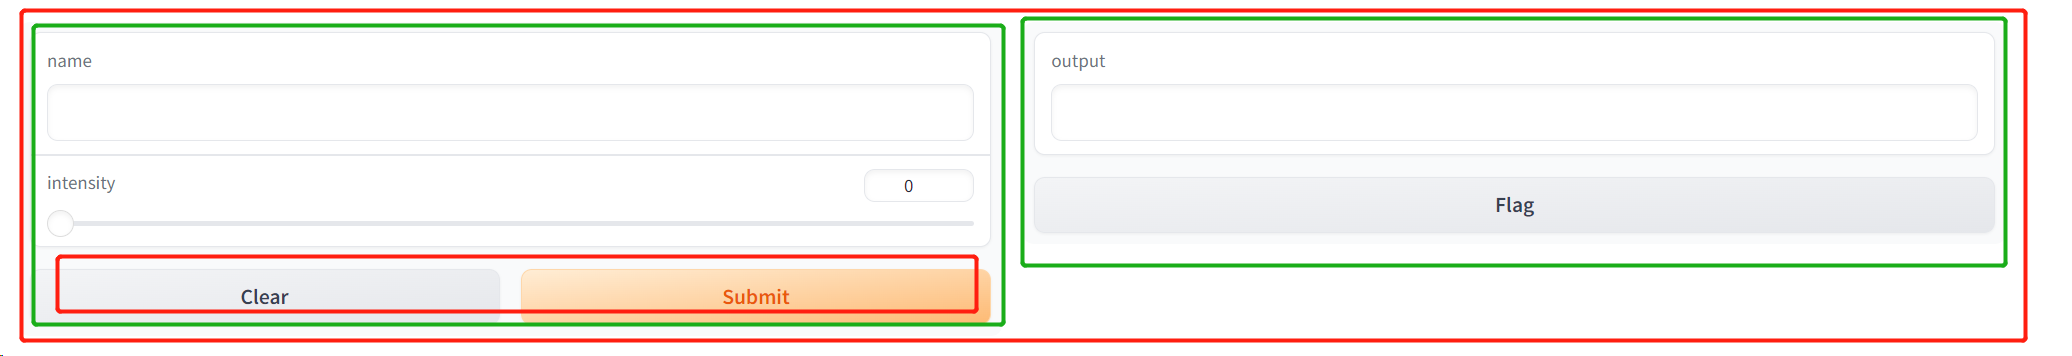

In [15]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

def clear():
    return "", "", 0
        
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            input_text = gr.Textbox()
            slider = gr.Slider()
            with gr.Row():
                submit_btn = gr.Button()
                clear_btn = gr.Button()
        with gr.Column():
            output_text = gr.Textbox()

    submit_btn.click(
        fn=greet,
        inputs=[input_text, slider],
        outputs=[output_text],
    )

    clear_btn.click(
        fn=clear,
        inputs=[],
        outputs=[input_text, output_text, slider]
    )

demo.launch()

Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


设定组件名字

In [7]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

def clear_textboxes(textbox1, textbox2, slider):
    return "", "", 0
        
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            input_text = gr.Textbox(label="name")
            slider = gr.Slider(label="intensity")
            with gr.Row():
                submit_btn = gr.Button(value="Submit")
                clear_btn = gr.Button(value="Clear")
        with gr.Column():
            output_text = gr.Textbox(label="output")

    submit_btn.click(
        fn=greet,
        inputs=[input_text, slider],
        outputs=[output_text],
    )

    clear_btn.click(
        fn=clear_textboxes,
        inputs=[],
        outputs=[input_text, output_text, slider]
    )

demo.launch()

D:\Software\anaconda3\envs\py38\lib\site-packages\gradio\utils.py:828: UserWarning: Expected 3 arguments for function <function clear_textboxes at 0x0000018626992F70>, received 0.
  warnings.warn(
D:\Software\anaconda3\envs\py38\lib\site-packages\gradio\utils.py:832: UserWarning: Expected at least 3 arguments for function <function clear_textboxes at 0x0000018626992F70>, received 0.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


### 分析mygpt项目

llm-developing-mygpt 项目